### 데이터 전처리하기: 5. KNN 모델에서
전처리 과정은 w2_titanicDT.ipynb에 정리되어 있음!

In [2]:
# 1. 결측치 확인

import pandas as pd

# 데이터 불러오기
df = pd.read_csv("../titanic.csv") # URL로 불러오려면 URL을 적어넣으면 됨

# 결측치 확인
print(df.isnull().sum()) # null인 칸 개수 반환

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
# 2. 결측치 제거(아래는 chatGPT가 권장한 처리 방법)
# Cabin 컬럼 제거, Embarked 컬럼 최빈값 처리, Age 컬럼 평균 or 중앙값 처리

df.drop(columns=['Cabin'], inplace=True) # Cabin 컬럼 삭제
    # inplace=True: 변경사항을 df에 덮어쓰겠다는 뜻. 기본적으로 컬럼(열) 변경 함수는 바뀐 결과를 반환해 새 변수에 할당하게 할 뿐, df 자체를 바꾸지는 않음. inplace=True를 쓰면 df 자체가 변화하게 됨.

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) # Embarked 결측치 채우기 (최빈값(가장 많이 등장한 값)으로 채우기)
    # fillna: 데이터의 결측값을 원하는 값으로 변경하는 메서드
    # mode()[0]: 특정 데이터의 최빈값을 반환. 최빈값은 여러개일 수 있으므로 첫 번째 최빈값([0])만 가져옴.

df['Age'].fillna(df['Age'].mean(), inplace=True) # Age 결측치 채우기 (평균값으로 채우기)
    # mean(): 특정 데이터의 평균값을 반환.

print(df.isnull().sum()) # 결측치 다시 확인


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\jt341\AppData\Local\Temp\ipykernel_14544\843196908.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) # Embarked 결측치 채우기 (최빈값(가장 많이 등장한 값)으로 채우기)
C:\Users\jt341\AppData\Local\Temp\ipykernel_14544\843196908.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

Survived
0    549
1    342
Name: count, dtype: int64


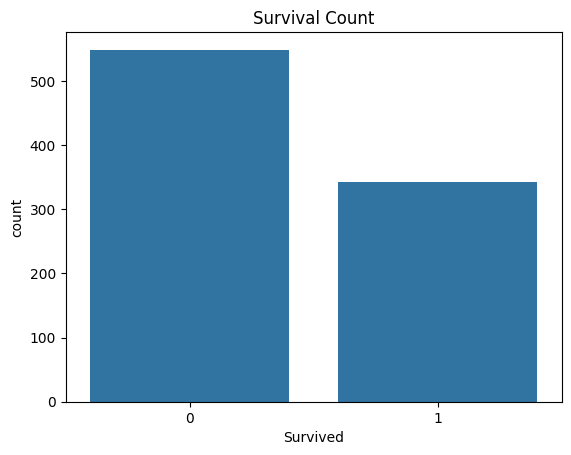

In [4]:
# 3. 레이블 불균형(imbalanced data) 확인

# Survived 값 개수 확인
print(df['Survived'].value_counts())
    # value_counts(): 열의 각 값의 개수를 반환

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['Survived'])
plt.title("Survival Count")
plt.show()

In [15]:
# 4. 노이즈 제거: 불필요한 컬럼(속성) 제거
# 보통 삭제하는 컬럼 종류:
    # 1. 레이블(결과)와 아무 관련 없는 컬럼: PassengerID(고객ID), Name, Ticket(티켓번호) 등은 고객의 생존 여부와 아무 관련이 없음
    # 2. 결측치가 너무 많은 컬럼: Cabin은 결측치가 891개 데이터 중 687개나 나옴. but Cabin 유무(0, 1) 같은 식으로 바꿔 사용하기도 함

# 불필요한 컬럼 제거(Cabin은 이미 2. 결측치 제거에서 없앴으므로 여기서는 하지 않음)
df_cleaned = df.drop(columns=['PassengerId', 'Name', 'Ticket'])

# 결과 확인
print(df_cleaned.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


In [16]:
# 5. 인코딩(숫자가 아닌 데이터를 숫자로 변환)
# 인코딩을 하는 이유: 일반적인 AI 모델은 숫자만 다룰 수 있기 때문!

# **인코딩 전: 열의 각 값의 개수 확인(이 개수를 알아둬야 인코딩 후 어떤 숫자가 어떤 값을 가리키는지 알 수 있음)
print(df_cleaned['Sex'].value_counts())  # 성별 개수 확인
print(df_cleaned['Embarked'].value_counts())  # 탑승항구 개수 확인
print("----[위: 변환 전, 아래: 변환 후]----")


# **인코딩: Label Encoding 방법 사용
# 변환 전, 후 값 개수를 비교하며 어떤 값이 어떤 숫자로 바뀌었는지 확인해보자
from sklearn.preprocessing import LabelEncoder

# Sex 컬럼 인코딩
encoder = LabelEncoder()
df_cleaned['Sex'] = encoder.fit_transform(df_cleaned['Sex'])
df_cleaned['Embarked'] = encoder.fit_transform(df_cleaned['Embarked'])

# 변환 후 확인
print(df_cleaned['Sex'].value_counts())  # 성별 개수 확인
print(df_cleaned['Embarked'].value_counts())  # 탑승항구 개수 확인
print(df_cleaned.head()) # 표 윗부분 확인

Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
----[위: 변환 전, 아래: 변환 후]----
Sex
1    577
0    314
Name: count, dtype: int64
Embarked
2    646
0    168
1     77
Name: count, dtype: int64
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


In [14]:
# 외전. 레이블 불균형 해결하기(균형 맞추기)
# SMOTE 외의 방법은 역시 w2_titanDT.ipynb에

# SMOTE: 일반적으로 가장 많이 사용. 기존 데이터 기반으로 새로운 데이터를 생성해 오버샘플링.
# 주의: 얘는 모든 데이터가 숫자일 때만 작동! 인코딩 먼저 해야 함.
from imblearn.over_sampling import SMOTE

X = df_cleaned.drop(columns=['Survived'])  # 입력 데이터
y = df_cleaned['Survived']  # 레이블

# SMOTE 적용
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y) # X_smote, y_smote가 샘플링 후 결과물

# 결과 확인
print(y_smote.value_counts())

Survived
0    549
1    549
Name: count, dtype: int64


#### 6. 만든 데이터로 KNN 모델 학습
KNN 모델: 새로운 데이터가 들어왔을 때, 기존 데이터 중 새 데이터와 가장 가까운 k개를 찾고, 그 k개의 다수결로 예측하는 방식.

* 얘도 데이터를 좌표 공간에 배치하기 때문에, 데이터를 표준화해야 함!

* KNN 알고리즘은 k값을 정하는 게 중요함. 각 k값마다 학습 결과가 어떻게 나오는지 보며 최적의 결과가 나오는 k값을 찾아야 함. 보통 알아서 찾아주는 라이브러리(GridSearchCV 등) 사용. **k가 작으면 과적합, k가 크면 과소적합이 될 수 있음.**

KNN의 동작 방식:
1. 기존 데이터를 좌표 공간(다차원 평면)에 배치
2. 새로운 데이터가 주어지면, 기존 데이터와의 거리 측정
3. 가장 가까운 k개의 데이터를 선택
4. 다수결(분류 문제) or 평균값(회귀 문제)으로 예측값 결정

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler # 표준화 라이브러리

# (1) 위에서 만든 데이터(SMOTE로 불균형 해소까지 한 데이터)를 가져와 train, test 분리(8:2 비율), 표준화
X = X_smote # survived를 뺀 모든 컬럼
y = y_smote # survived만 들어 있음(얘가 레이블(예측할 대상))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # test_size: 전체 데이터 중 test에 할당할 비율

scaler = StandardScaler() # 아래 2줄에서 X_train, X_test를 표준화
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled  # 4개 데이터 중 X_train 출력


# (2) KNN 모델 생성 & 학습
knn_model = KNeighborsClassifier(n_neighbors=5)  # k=5로 설정
knn_model.fit(X_train_scaled, y_train)  # 모델 학습


# (3) 학습된 모델로 예측 수행, 예측 정확도 평가
y_pred = knn_model.predict(X_test_scaled) # 예측
accuracy = accuracy_score(y_test, y_pred) # 정확도 평가
print(f"KNN 모델 정확도: {accuracy:.2f}")


# (외전) 최적의 K 찾기 (GridSearchCV 사용)
param_grid = {'n_neighbors': range(1, 21)}  # k 값 범위: 1~20
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

#   최적의 K 값 출력
print(f"최적의 K 값: {grid_search.best_params_['n_neighbors']}")

#   최적의 K로 다시 모델 학습
best_k = grid_search.best_params_['n_neighbors']
knn_best_model = KNeighborsClassifier(n_neighbors=best_k)
knn_best_model.fit(X_train_scaled, y_train)

#   최적 K 모델로 다시 평가
y_pred_best = knn_best_model.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"최적 K ({best_k}) 사용한 KNN 모델 정확도: {best_accuracy:.2f}")


KNN 모델 정확도: 0.85
최적의 K 값: 7
최적 K (7) 사용한 KNN 모델 정확도: 0.85


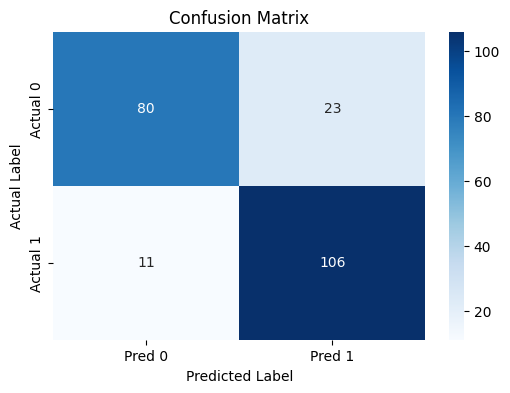

              precision    recall  f1-score   support

           0       0.88      0.78      0.82       103
           1       0.82      0.91      0.86       117

    accuracy                           0.85       220
   macro avg       0.85      0.84      0.84       220
weighted avg       0.85      0.85      0.84       220



In [23]:
# 7. Confusion Matrix 만들기

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 예측값과 실제값 비교
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

# 정밀도, 재현율, F1-score 출력
print(classification_report(y_test, y_pred))